In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ESG_Project/Dataset/ESG.csv')

In [ ]:
df.dtypes

Company                        object
Market                         object
Region                         object
Sector                         object
Credit rating impact            int64
COUNTRY_RISK_MARKET_RETURN    float64
COUNTRY_RISK_PREMIUM          float64
COUNTRY_RISK_RFR              float64
EPS_GROWTH                    float64
GROSS_MARGIN                  float64
IS_INT_EXPENSE                float64
OPER_MARGIN                   float64
RISK_PREMIUM                  float64
UNLEVERED_BETA                float64
WACC                          float64
WACC_COST_DEBT                float64
WACC_COST_EQUITY              float64
Total E                         int64
Total S                         int64
Total G                         int64
EAQ                             int64
EFM                             int64
EWT                             int64
EHZ                             int64
EIM                             int64
SCR                             int64
SCW         

In [ ]:
df.isna().sum()

Company                          0
Market                           0
Region                           0
Sector                           0
Credit rating impact             0
COUNTRY_RISK_MARKET_RETURN     165
COUNTRY_RISK_PREMIUM           371
COUNTRY_RISK_RFR               371
EPS_GROWTH                     728
GROSS_MARGIN                   235
IS_INT_EXPENSE                 223
OPER_MARGIN                      9
RISK_PREMIUM                    68
UNLEVERED_BETA                1099
WACC                            68
WACC_COST_DEBT                  69
WACC_COST_EQUITY                68
Total E                          0
Total S                          0
Total G                          0
EAQ                              0
EFM                              0
EWT                              0
EHZ                              0
EIM                              0
SCR                              0
SCW                              0
SLB                              0
SEW                 

In [ ]:
missing_oper_margin = df[df['OPER_MARGIN'].isnull()]['Company']
missing_oper_margin

0       Roberts, Hernandez and Aguilar
363           Jackson, Ortiz and Allen
574                         Murphy-Cox
614          Curry, Fuller and Goodwin
711                         Warren LLC
4635            Wood, Williams and Lee
6717                      Chen-Jenkins
8720         Bennett, White and Conner
9639                       Huber Group
Name: Company, dtype: object

In [ ]:
numerical_features = ['COUNTRY_RISK_PREMIUM','COUNTRY_RISK_RFR',
                      'EPS_GROWTH', 'GROSS_MARGIN','IS_INT_EXPENSE','OPER_MARGIN','RISK_PREMIUM',         #COUNTRY_RISK_RFR, COUNTRY_RISK_MARKET_RETURN ->mode
                      'UNLEVERED_BETA','WACC','WACC_COST_DEBT','WACC_COST_EQUITY']


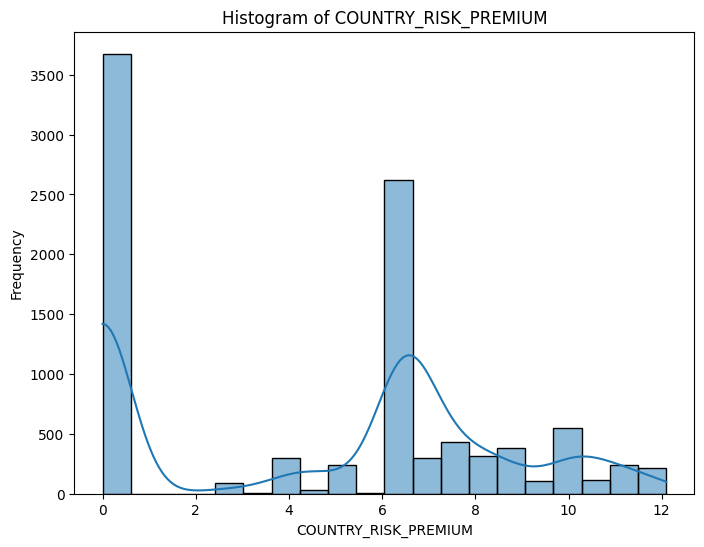

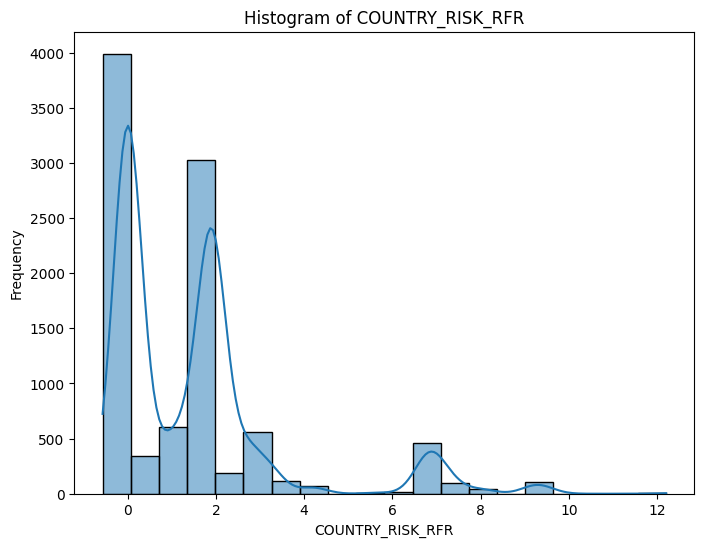

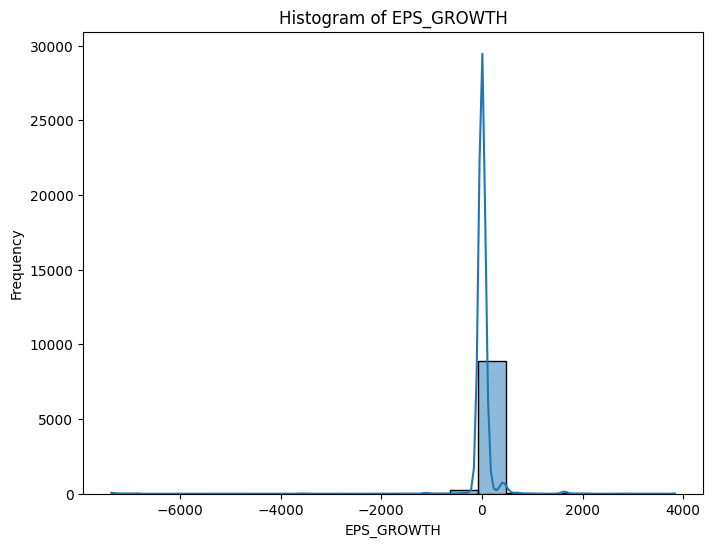

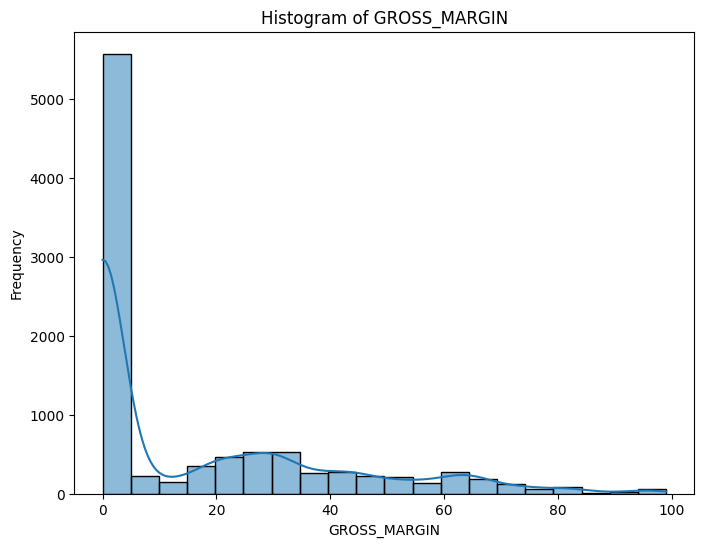

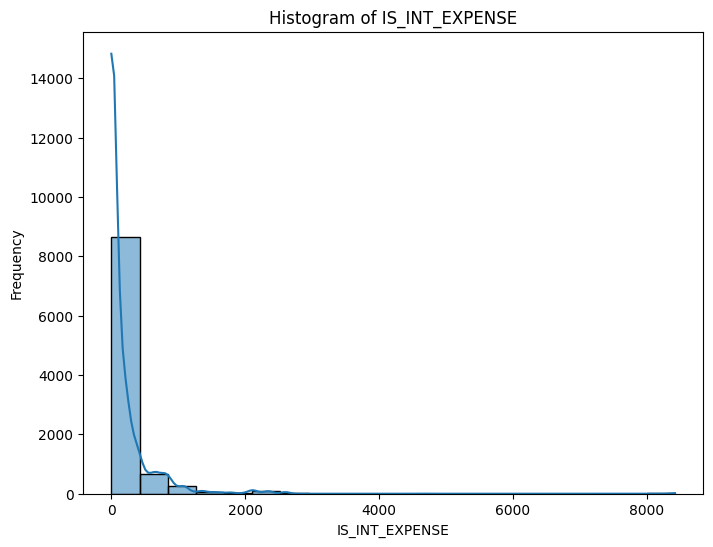

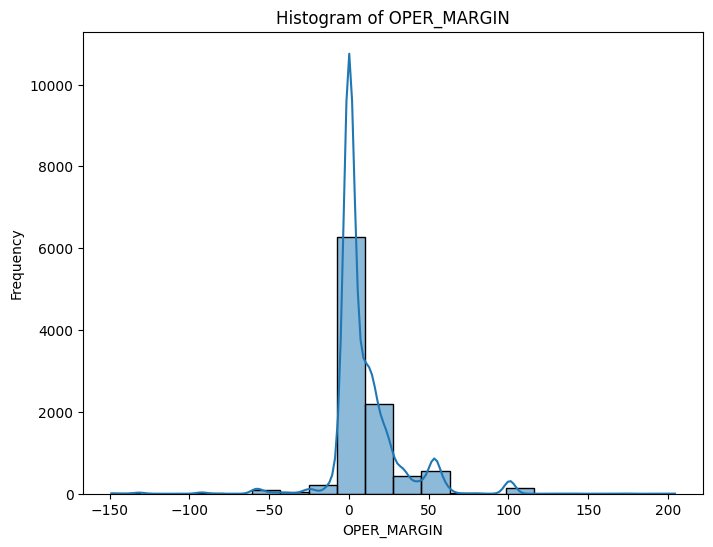

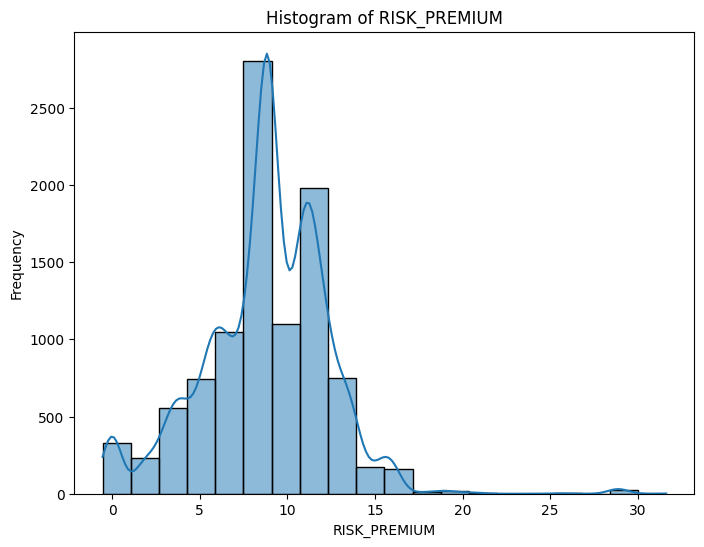

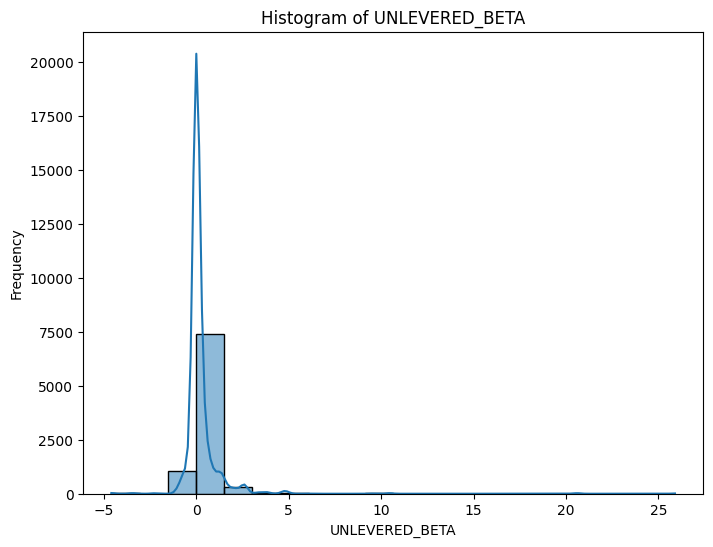

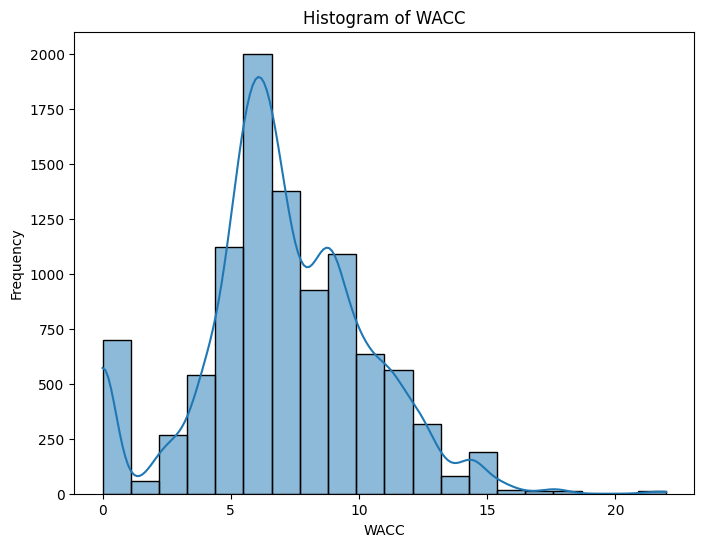

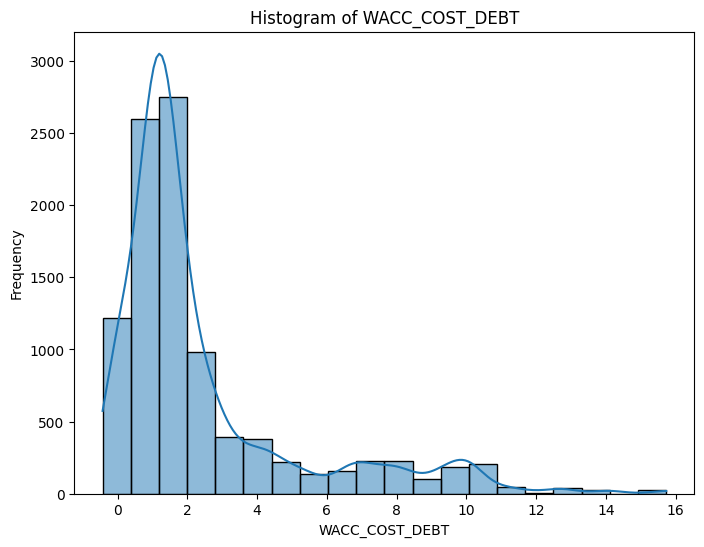

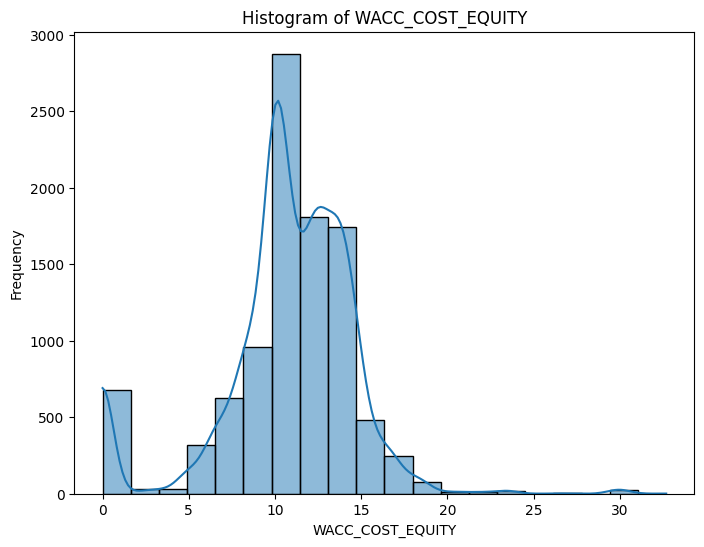

In [ ]:
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df[feature].dropna(), kde=True, bins=20)
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:


median_fill_columns = ['IS_INT_EXPENSE', 'GROSS_MARGIN', 'COUNTRY_RISK_PREMIUM', 'EPS_GROWTH',
                       'UNLEVERED_BETA', 'WACC_COST_DEBT']
for column in median_fill_columns:
    df[column] = df[column].fillna(df[column].median())

df.dropna(subset=['OPER_MARGIN'], inplace=True)

mean_fill_columns = ['RISK_PREMIUM', 'WACC_COST_EQUITY', 'WACC']

for column in mean_fill_columns:
    df[column] = df[column].fillna(df[column].mean())

df['COUNTRY_RISK_RFR']=df['COUNTRY_RISK_RFR'].fillna(df['COUNTRY_RISK_RFR'].mode()[0])
df['COUNTRY_RISK_MARKET_RETURN']= df['COUNTRY_RISK_MARKET_RETURN'].fillna(df['COUNTRY_RISK_MARKET_RETURN'].mode()[0])

df.isna().sum()

Company                       0
Market                        0
Region                        0
Sector                        0
Credit rating impact          0
COUNTRY_RISK_MARKET_RETURN    0
COUNTRY_RISK_PREMIUM          0
COUNTRY_RISK_RFR              0
EPS_GROWTH                    0
GROSS_MARGIN                  0
IS_INT_EXPENSE                0
OPER_MARGIN                   0
RISK_PREMIUM                  0
UNLEVERED_BETA                0
WACC                          0
WACC_COST_DEBT                0
WACC_COST_EQUITY              0
Total E                       0
Total S                       0
Total G                       0
EAQ                           0
EFM                           0
EWT                           0
EHZ                           0
EIM                           0
SCR                           0
SCW                           0
SLB                           0
SEW                           0
SIM                           0
GEX                           0
GGV     

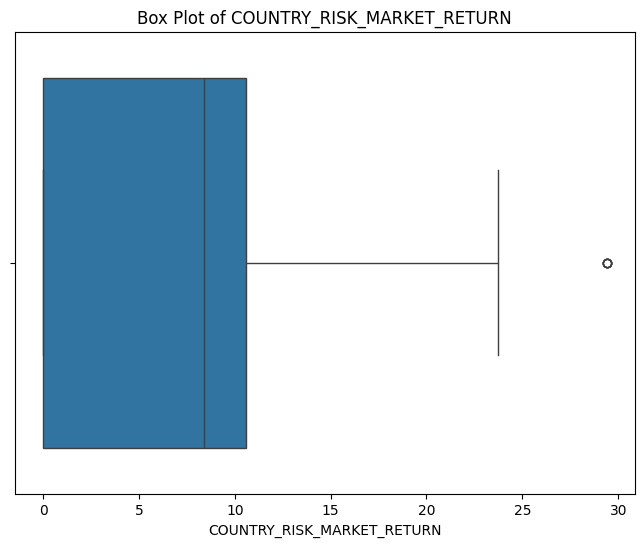

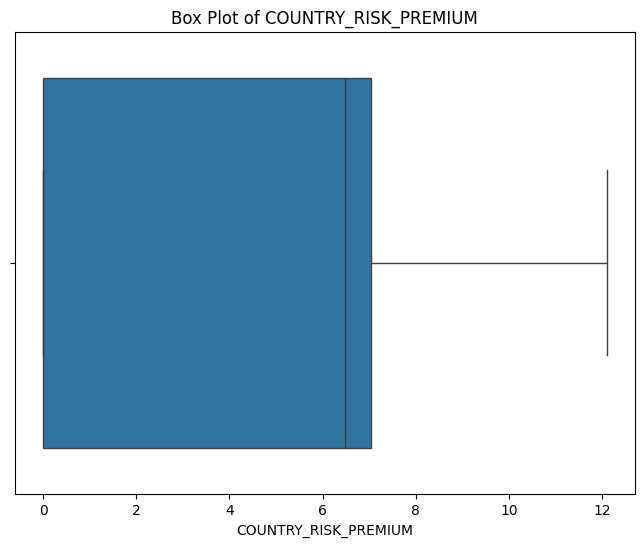

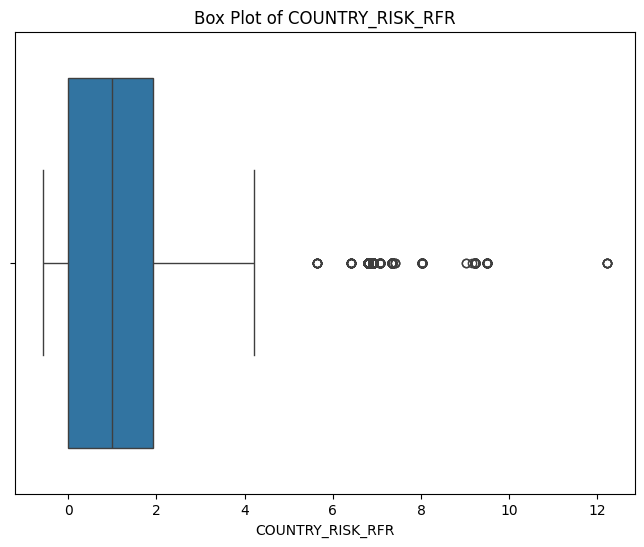

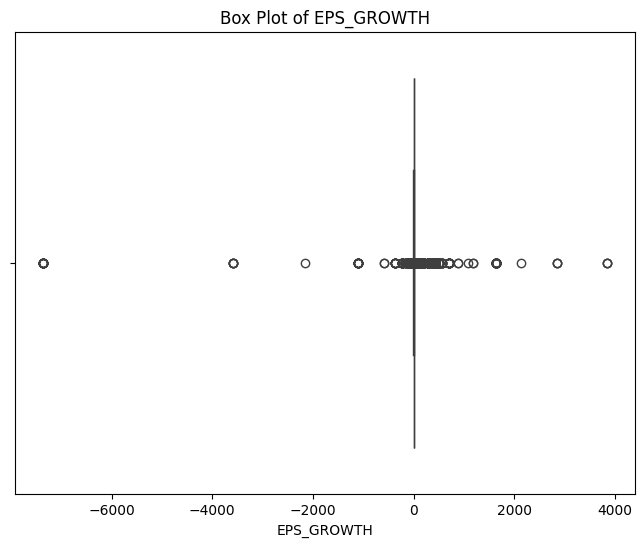

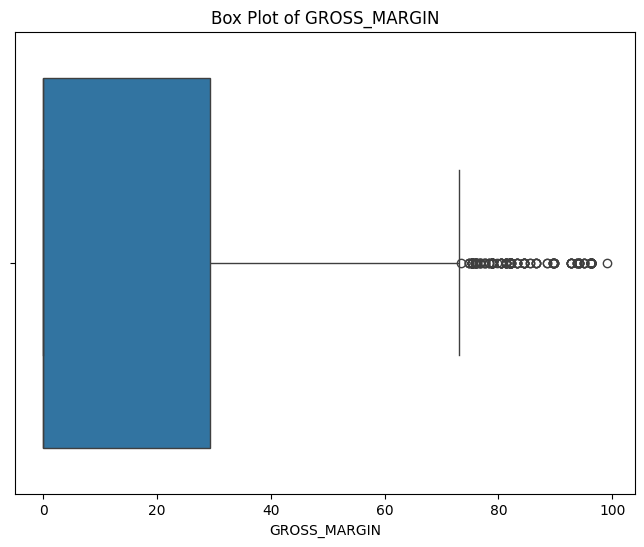

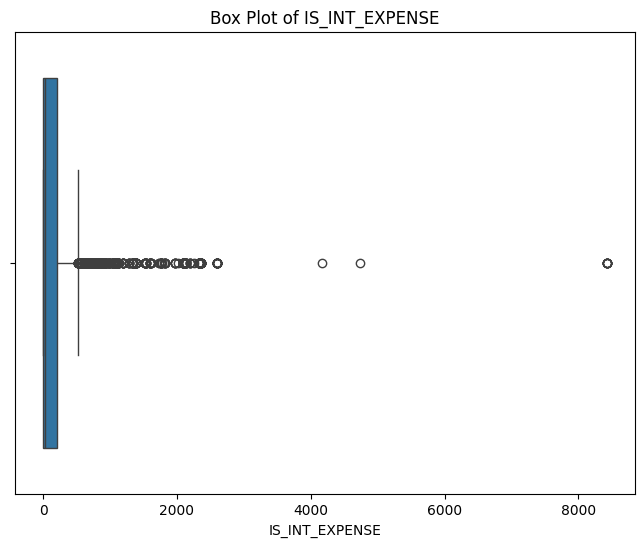

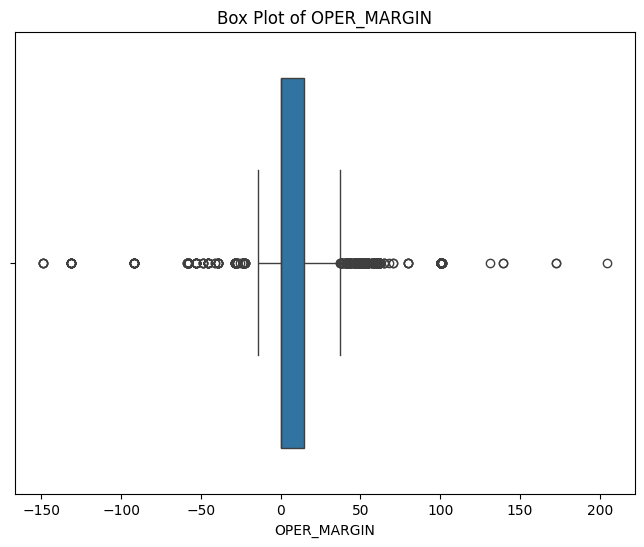

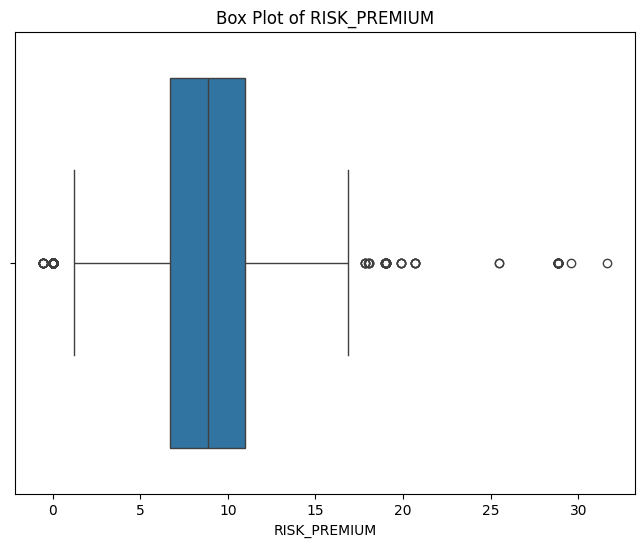

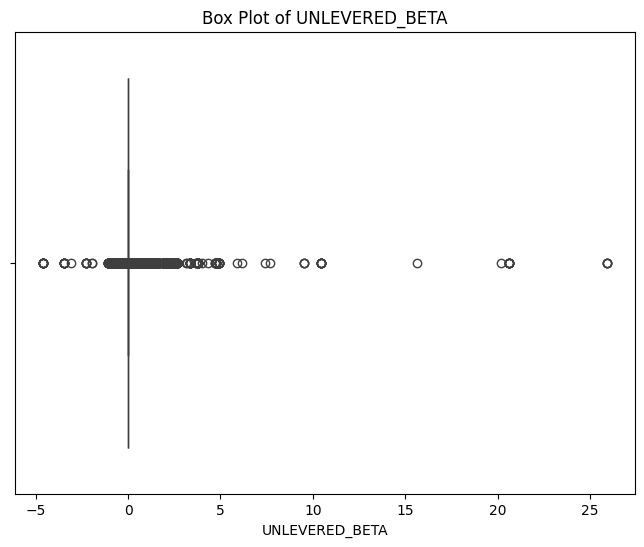

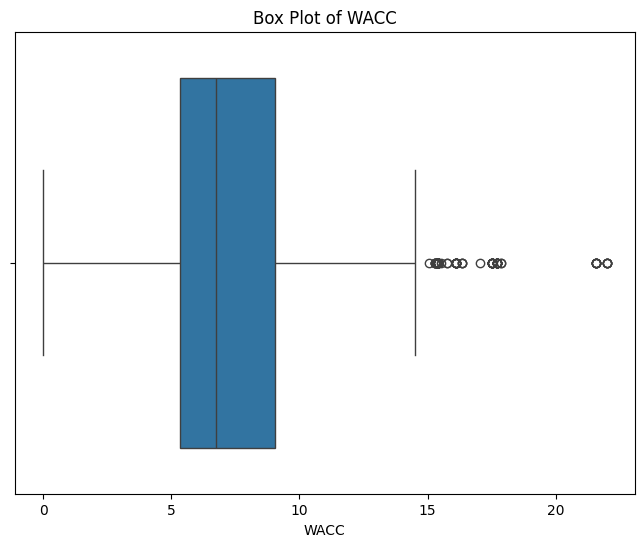

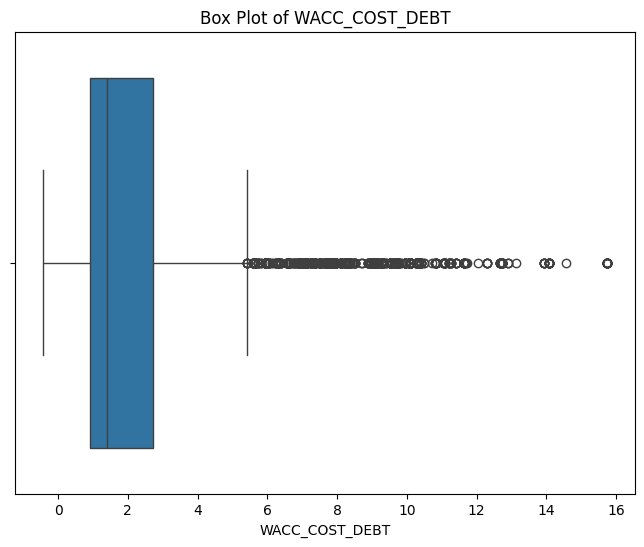

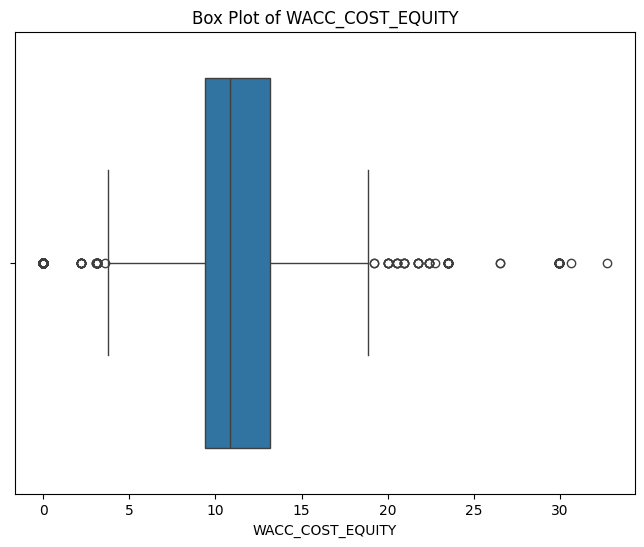

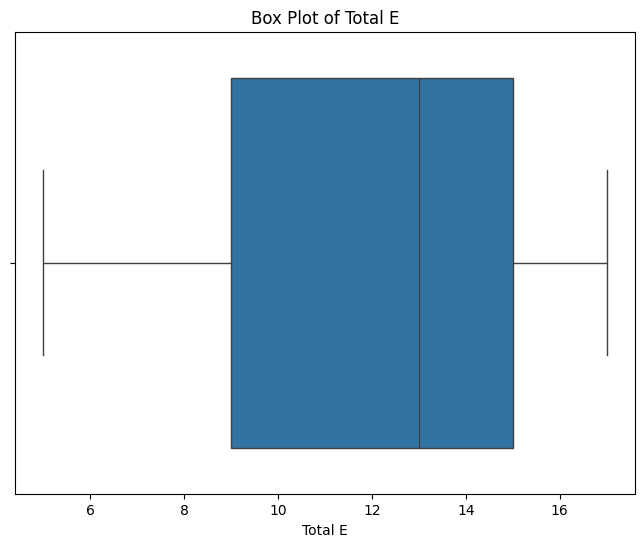

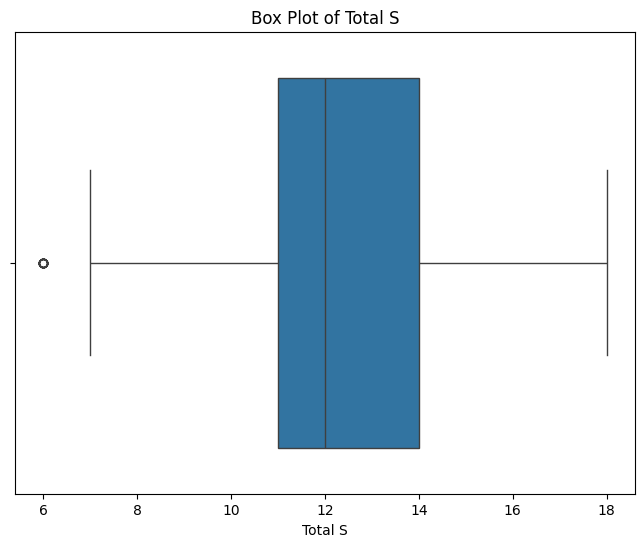

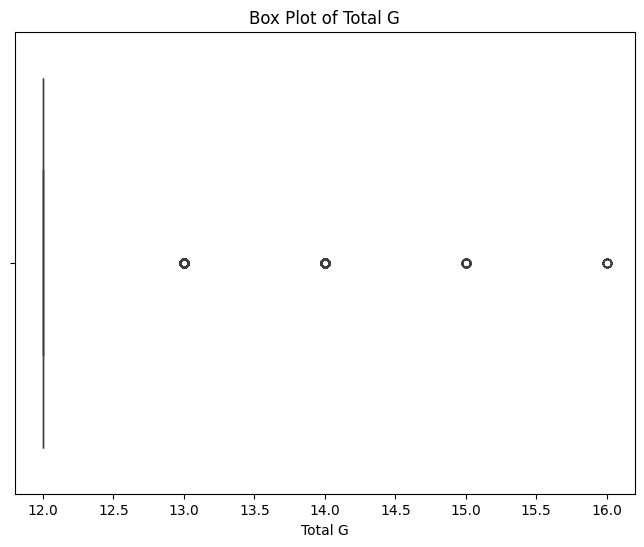

In [ ]:
numerical_features = ['COUNTRY_RISK_MARKET_RETURN','COUNTRY_RISK_PREMIUM','COUNTRY_RISK_RFR',
                      'EPS_GROWTH', 'GROSS_MARGIN','IS_INT_EXPENSE','OPER_MARGIN','RISK_PREMIUM',         #COUNTRY_RISK_RFR, COUNTRY_RISK_MARKET_RETURN -mode
                      'UNLEVERED_BETA','WACC','WACC_COST_DEBT','WACC_COST_EQUITY','Total E','Total S','Total G']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
#outliers

numerical_features_1 = [
                      'EPS_GROWTH', 'GROSS_MARGIN', 'OPER_MARGIN',
                      'UNLEVERED_BETA', 'WACC', 'WACC_COST_DEBT', 'WACC_COST_EQUITY']


z_scores = np.abs((df[numerical_features_1] - df[numerical_features_1].mean()) / df[numerical_features_1].std())
threshold = 3
outliers = df[(z_scores > threshold).any(axis=1)]
print("Outliers:")
print(outliers)


Outliers:
                        Company             Market         Region  \
69                 Hodges Group   Emerging Markets  EM - Americas   
76        Lopez, Hunt and Smith   Emerging Markets  EM - Americas   
123          Cervantes-Williams  Developed Markets  DM - Americas   
129               Baldwin-Berry   Emerging Markets    EM - CEEMEA   
131             Flores-Hamilton   Emerging Markets    EM - CEEMEA   
...                         ...                ...            ...   
9855              Todd and Sons  Developed Markets    DM - Europe   
9859  Mcknight, Cox and Shaffer  Developed Markets    DM - Europe   
9889                Wilson-Holt   Emerging Markets  EM - Americas   
9960      Mccall, Davis and Key  Developed Markets    DM - Europe   
9972               Smith-Knight  Developed Markets    DM - Europe   

                 Sector  Credit rating impact  COUNTRY_RISK_MARKET_RETURN  \
69            Utilities                     0                     11.0541   
76     

In [ ]:
# outliers fixing
for feature in numerical_features_1:
    median_value = df[feature].median()
    df.loc[z_scores[feature] > threshold, feature] = median_value


outliers_handled = df[(z_scores > threshold).any(axis=1)]
print("Outliers handled:")
print(outliers_handled)

Outliers handled:
                        Company             Market         Region  \
69                 Hodges Group   Emerging Markets  EM - Americas   
76        Lopez, Hunt and Smith   Emerging Markets  EM - Americas   
123          Cervantes-Williams  Developed Markets  DM - Americas   
129               Baldwin-Berry   Emerging Markets    EM - CEEMEA   
131             Flores-Hamilton   Emerging Markets    EM - CEEMEA   
...                         ...                ...            ...   
9855              Todd and Sons  Developed Markets    DM - Europe   
9859  Mcknight, Cox and Shaffer  Developed Markets    DM - Europe   
9889                Wilson-Holt   Emerging Markets  EM - Americas   
9960      Mccall, Davis and Key  Developed Markets    DM - Europe   
9972               Smith-Knight  Developed Markets    DM - Europe   

                 Sector  Credit rating impact  COUNTRY_RISK_MARKET_RETURN  \
69            Utilities                     0                     11.0541   

In [ ]:
df_1=df[['EPS_GROWTH', 'IS_INT_EXPENSE', 'OPER_MARGIN', 'UNLEVERED_BETA', 'WACC_COST_DEBT', 'WACC_COST_EQUITY']]


In [ ]:
a=df_1['IS_INT_EXPENSE'].dropna().unique()
a.sort()
print(min(a))
b=max(a)
digit = float(b)
print(digit)


0.0
8422.0


In [ ]:
df['Credit rating impact'].value_counts()

Credit rating impact
0    7867
1    2124
Name: count, dtype: int64

In [ ]:
selected_columns = ['Credit rating impact','EAQ','EFM', 'EWT', 'EHZ', 'EIM', 'SCR', 'SCW', 'SLB', 'SEW', 'SIM', 'GEX', 'GGV', 'GST', 'GTR']


selected_df = df[selected_columns]
correlation_matrix = selected_df.corr(numeric_only=True)
correlation_with_credit_rating = correlation_matrix['Credit rating impact']
print(correlation_with_credit_rating)

Credit rating impact    1.000000
EAQ                    -0.004055
EFM                    -0.002755
EWT                     0.001658
EHZ                    -0.013883
EIM                    -0.017685
SCR                    -0.011880
SCW                    -0.003289
SLB                     0.000815
SEW                    -0.004632
SIM                    -0.016324
GEX                     0.197691
GGV                     0.400536
GST                     0.340219
GTR                     0.344700
Name: Credit rating impact, dtype: float64


In [ ]:
features_to_remove = ['Sector','EAQ','EFM', 'EWT', 'EHZ', 'EIM', 'SCR', 'SCW', 'SLB', 'SEW', 'SIM', 'GEX', 'GGV', 'GST', 'GTR']
df = df.drop(columns=features_to_remove)
df.head()

,Company,Market,Region,Credit rating impact,COUNTRY_RISK_MARKET_RETURN,COUNTRY_RISK_PREMIUM,COUNTRY_RISK_RFR,EPS_GROWTH,GROSS_MARGIN,IS_INT_EXPENSE,OPER_MARGIN,RISK_PREMIUM,UNLEVERED_BETA,WACC,WACC_COST_DEBT,WACC_COST_EQUITY,Total E,Total S,Total G
1,"Hughes, Jackson and Patterson",Emerging Markets,EM - Asia,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8094,0.0,0.0,0.0,0.0,13,14,12
2,Grant PLC,Emerging Markets,EM - Americas,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,13,14,12
3,Miller-Schultz,Developed Markets,DM - Asia,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0718,0.0,0.0,0.0,0.0,15,13,12
4,Donovan-Kemp,Emerging Markets,EM - Americas,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3274,0.0,0.0,0.0,0.0,13,14,12
5,"Wilkins, Flynn and Barber",Emerging Markets,EM - Americas,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8808,0.0,0.0,0.0,0.0,15,12,12


In [ ]:
df['OPER_MARGIN'].unique()

array([  0.      ,  14.6542  ,  10.7826  ,  48.5968  ,   0.1151  ,
       -14.0895  ,  18.5437  ,   4.9756  ,   7.6492  ,  -3.2194  ,
        26.5297  ,   7.4819  ,  25.693   ,  36.8902  ,  11.8597  ,
        -2.3165  ,  11.6849  ,  20.2209  ,  13.3143  ,  14.3187  ,
         1.0121  ,   4.1709  ,  54.2582  ,   3.0211  ,  22.6698  ,
        29.2645  ,  11.0357  ,  -1.7778  ,  -4.1411  ,  12.9709  ,
         7.5069  ,   5.133   ,  15.4089  ,  14.6699  ,   2.3804  ,
        15.6645  ,  24.5247  , -28.3341  ,  32.6235  ,  52.1621  ,
        16.6156  ,   6.1603  ,   9.4788  ,  20.3059  ,  12.6188  ,
         0.3724  ,   9.9931  ,  -3.1605  ,   8.1687  ,  12.8262  ,
        12.8818  ,   7.4832  ,  14.6688  ,  42.9679  ,   6.6968  ,
         1.4128  ,  10.4517  ,   8.045   ,  17.1462  ,   2.6369  ,
        50.5358  ,  22.5259  ,   9.9667  ,  33.4986  ,  41.1496  ,
         6.4303  ,  13.4304  ,  25.2741  ,  52.5782  ,  24.0998  ,
        52.5516  ,  -2.3602  ,   8.3065  ,   3.9938  ,  12.564

In [ ]:
selected=['COUNTRY_RISK_MARKET_RETURN','COUNTRY_RISK_PREMIUM','COUNTRY_RISK_RFR',
                      'EPS_GROWTH', 'GROSS_MARGIN','IS_INT_EXPENSE','OPER_MARGIN','RISK_PREMIUM',         #COUNTRY_RISK_RFR, COUNTRY_RISK_MARKET_RETURN -mode
                      'UNLEVERED_BETA','WACC','WACC_COST_DEBT','WACC_COST_EQUITY']
print(df.iloc[350:400:5][selected])

     COUNTRY_RISK_MARKET_RETURN  COUNTRY_RISK_PREMIUM  COUNTRY_RISK_RFR  \
351                      8.4018                6.4843            1.9175   
356                     13.2498                3.7583            9.4915   
361                      8.4018                6.4843            1.9175   
367                      0.0000                0.0000            0.0000   
372                      0.0000                0.0000            0.0000   
377                      0.0000                0.0000            0.0000   
382                      7.9467                6.6247            1.3220   
387                      9.0794                7.5833            1.4961   
392                      8.7800                8.6622            0.1178   
397                      8.4018                6.4843            1.9175   

     EPS_GROWTH  GROSS_MARGIN  IS_INT_EXPENSE  OPER_MARGIN  RISK_PREMIUM  \
351     13.4752        0.0000        208.7150      54.2582        8.8329   
356    -97.7732       

In [ ]:
corr_matrix = df[['Credit rating impact','COUNTRY_RISK_MARKET_RETURN', 'COUNTRY_RISK_PREMIUM', 'COUNTRY_RISK_RFR', 'RISK_PREMIUM', ]].corr(numeric_only=True
)
print(corr_matrix)

                            Credit rating impact  COUNTRY_RISK_MARKET_RETURN  \
Credit rating impact                    1.000000                    0.382674   
COUNTRY_RISK_MARKET_RETURN              0.382674                    1.000000   
COUNTRY_RISK_PREMIUM                    0.413970                    0.771120   
COUNTRY_RISK_RFR                        0.264461                    0.557343   
RISK_PREMIUM                           -0.159310                    0.058137   

                            COUNTRY_RISK_PREMIUM  COUNTRY_RISK_RFR  \
Credit rating impact                    0.413970          0.264461   
COUNTRY_RISK_MARKET_RETURN              0.771120          0.557343   
COUNTRY_RISK_PREMIUM                    1.000000          0.322065   
COUNTRY_RISK_RFR                        0.322065          1.000000   
RISK_PREMIUM                            0.198793         -0.242204   

                            RISK_PREMIUM  
Credit rating impact           -0.159310  
COUNTRY_RISK

In [ ]:

selected_columns = df[['Company', 'Market', 'Region', 'Credit rating impact']]
print(selected_columns.head())

                         Company             Market         Region  \
1  Hughes, Jackson and Patterson   Emerging Markets      EM - Asia   
2                      Grant PLC   Emerging Markets  EM - Americas   
3                 Miller-Schultz  Developed Markets      DM - Asia   
4                   Donovan-Kemp   Emerging Markets  EM - Americas   
5      Wilkins, Flynn and Barber   Emerging Markets  EM - Americas   

   Credit rating impact  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  


In [ ]:
df['Region'].unique()

array(['EM - Asia', 'EM - Americas', 'DM - Asia', 'EM - CEEMEA',
       'DM - Europe', 'DM - Americas'], dtype=object)

In [ ]:
# df['Sector'].unique()

In [ ]:
df = df.drop(['Company'],axis=1)
df.head(2)

,Market,Region,Credit rating impact,COUNTRY_RISK_MARKET_RETURN,COUNTRY_RISK_PREMIUM,COUNTRY_RISK_RFR,EPS_GROWTH,GROSS_MARGIN,IS_INT_EXPENSE,OPER_MARGIN,RISK_PREMIUM,UNLEVERED_BETA,WACC,WACC_COST_DEBT,WACC_COST_EQUITY,Total E,Total S,Total G
1,Emerging Markets,EM - Asia,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8094,0.0,0.0,0.0,0.0,13,14,12
2,Emerging Markets,EM - Americas,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,13,14,12


In [ ]:
df['Region'] = df['Region'].apply(lambda x: x.split(' - ')[1])
df.head(3)

,Market,Region,Credit rating impact,COUNTRY_RISK_MARKET_RETURN,COUNTRY_RISK_PREMIUM,COUNTRY_RISK_RFR,EPS_GROWTH,GROSS_MARGIN,IS_INT_EXPENSE,OPER_MARGIN,RISK_PREMIUM,UNLEVERED_BETA,WACC,WACC_COST_DEBT,WACC_COST_EQUITY,Total E,Total S,Total G
1,Emerging Markets,Asia,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8094,0.0,0.0,0.0,0.0,13,14,12
2,Emerging Markets,Americas,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,13,14,12
3,Developed Markets,Asia,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0718,0.0,0.0,0.0,0.0,15,13,12


In [ ]:
df_encoded=pd.get_dummies(df[['Market','Region']],dtype =int,drop_first=True)
df_encoded

,Market_Emerging Markets,Region_Asia,Region_CEEMEA,Region_Europe
1,1,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0
...,...,...,...,...
9995,0,1,0,0
9996,1,1,0,0
9997,1,0,0,0
9998,1,0,0,0


In [ ]:
dfe=pd.concat([df,df_encoded],axis=1)
import pickle
# with open('encoder.pkl', 'wb') as f:
#     pickle.dump(df_encoded, f)
# from joblib import dump
# dump(df_encoded, 'encoder.pkl')

dfe.head(2)

,Market,Region,Credit rating impact,COUNTRY_RISK_MARKET_RETURN,COUNTRY_RISK_PREMIUM,COUNTRY_RISK_RFR,EPS_GROWTH,GROSS_MARGIN,IS_INT_EXPENSE,OPER_MARGIN,...,WACC,WACC_COST_DEBT,WACC_COST_EQUITY,Total E,Total S,Total G,Market_Emerging Markets,Region_Asia,Region_CEEMEA,Region_Europe
1,Emerging Markets,Asia,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13,14,12,1,1,0,0
2,Emerging Markets,Americas,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13,14,12,1,0,0,0


In [ ]:
columns_drop=['Market','Region']
dfe=dfe.drop(columns_drop,axis=1)
dfe.columns

Index(['Credit rating impact', 'COUNTRY_RISK_MARKET_RETURN',
       'COUNTRY_RISK_PREMIUM', 'COUNTRY_RISK_RFR', 'EPS_GROWTH',
       'GROSS_MARGIN', 'IS_INT_EXPENSE', 'OPER_MARGIN', 'RISK_PREMIUM',
       'UNLEVERED_BETA', 'WACC', 'WACC_COST_DEBT', 'WACC_COST_EQUITY',
       'Total E', 'Total S', 'Total G', 'Market_Emerging Markets',
       'Region_Asia', 'Region_CEEMEA', 'Region_Europe'],
      dtype='object')

In [ ]:
dfe.columns


Index(['Credit rating impact', 'COUNTRY_RISK_MARKET_RETURN',
       'COUNTRY_RISK_PREMIUM', 'COUNTRY_RISK_RFR', 'EPS_GROWTH',
       'GROSS_MARGIN', 'IS_INT_EXPENSE', 'OPER_MARGIN', 'RISK_PREMIUM',
       'UNLEVERED_BETA', 'WACC', 'WACC_COST_DEBT', 'WACC_COST_EQUITY',
       'Total E', 'Total S', 'Total G', 'Market_Emerging Markets',
       'Region_Asia', 'Region_CEEMEA', 'Region_Europe'],
      dtype='object')

In [ ]:
import pickle
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['COUNTRY_RISK_MARKET_RETURN','COUNTRY_RISK_PREMIUM','COUNTRY_RISK_RFR',
                      'EPS_GROWTH', 'GROSS_MARGIN','IS_INT_EXPENSE','OPER_MARGIN','RISK_PREMIUM',         #COUNTRY_RISK_RFR, COUNTRY_RISK_MARKET_RETURN -mode
                      'UNLEVERED_BETA','WACC','WACC_COST_DEBT','WACC_COST_EQUITY','Total E','Total S','Total G']

scaler = MinMaxScaler()
# dfe[numerical_features] = scaler.fit_transform(df[numerical_features])
# with open('min_max_scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)
# dump(scaler,'min_max_scaler.pkl')


In [ ]:
dfe.head()

,Credit rating impact,COUNTRY_RISK_MARKET_RETURN,COUNTRY_RISK_PREMIUM,COUNTRY_RISK_RFR,EPS_GROWTH,GROSS_MARGIN,IS_INT_EXPENSE,OPER_MARGIN,RISK_PREMIUM,UNLEVERED_BETA,WACC,WACC_COST_DEBT,WACC_COST_EQUITY,Total E,Total S,Total G,Market_Emerging Markets,Region_Asia,Region_CEEMEA,Region_Europe
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8094,0.0,0.0,0.0,0.0,13,14,12,1,1,0,0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,13,14,12,1,0,0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0718,0.0,0.0,0.0,0.0,15,13,12,0,1,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3274,0.0,0.0,0.0,0.0,13,14,12,1,0,0,0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8808,0.0,0.0,0.0,0.0,15,12,12,1,0,0,0


In [ ]:
dfe['Credit rating impact'].value_counts()


Credit rating impact
0    7867
1    2124
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


x = dfe.drop('Credit rating impact', axis=1).values
y = dfe['Credit rating impact'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Initialize RandomForestClassifier with adjusted class_weight
#  adjusting class weights
class_weights = {0: 1.0, 1: 2.5}  # Adjust the weight of class 1 accordingly
clf = RandomForestClassifier(class_weight=class_weights,
                             n_estimators=100,        # Increase number of trees
                             max_depth=10,            # Limit depth of each tree
                             min_samples_split=10,    # Increase min samples per split
                             min_samples_leaf=5,      # Increase min samples per leaf
                             max_features='sqrt',     # Limit number of features to consider at each split

                             random_state=42)

# Fit the model on resampled data
clf.fit(x_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred = clf.predict(x_test)

# Evaluate performance
print(classification_report(y_test, y_pred))
with open ('Credit_rating _model.pkl', 'wb') as f:
  pickle.dump(clf, f)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2373
           1       0.96      1.00      0.98       625

    accuracy                           0.99      2998
   macro avg       0.98      0.99      0.99      2998
weighted avg       0.99      0.99      0.99      2998



In [ ]:
# with open ('Credit_rating _model.pkl', 'wb') as f:
  # pickle.dump(clf, f)

In [ ]:
# for validation

x = dfe.drop('Credit rating impact', axis=1)
y = dfe['Credit rating impact']

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=42)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Function to print classification report and confusion matrix
def evaluate_model(clf, X_train, y_train, X_val, y_val):
    # Predictions on training set
    train_preds = clf.predict(x_train_resampled)
    # Predictions on validation set
    val_preds = clf.predict(x_test)

    # Print classification report and confusion matrix for training set
    print("Training Set Metrics:")
    print(classification_report(y_train, train_preds))
    print("Confusion Matrix for Training Set:")
    print(confusion_matrix(y_train, train_preds))

    # Print classification report and confusion matrix for validation set
    print("\nValidation Set Metrics:")
    print(classification_report(y_val, val_preds))
    print("Confusion Matrix for Validation Set:")
    print(confusion_matrix(y_val, val_preds))

# Evaluate the model
evaluate_model(clf,x_train_resampled, y_train_resampled, x_test, y_test)


Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5494
           1       0.99      1.00      1.00      5494

    accuracy                           1.00     10988
   macro avg       1.00      1.00      1.00     10988
weighted avg       1.00      1.00      1.00     10988

Confusion Matrix for Training Set:
[[5448   46]
 [   2 5492]]

Validation Set Metrics:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2373
           1       0.96      1.00      0.98       625

    accuracy                           0.99      2998
   macro avg       0.98      0.99      0.99      2998
weighted avg       0.99      0.99      0.99      2998

Confusion Matrix for Validation Set:
[[2350   23]
 [   3  622]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold


clf.fit(x_train_resampled, y_train_resampled)

#cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(
   clf,x_train_resampled, y_train_resampled,cv=cv, scoring='accuracy'
)

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores with Regularized Random Forest:", scores)
print("Mean CV Accuracy with Regularized Random Forest:", scores.mean())


Cross-Validation Scores with Regularized Random Forest: [0.99499545 0.99363057 0.99272066 0.99408284 0.99271734]
Mean CV Accuracy with Regularized Random Forest: 0.9936293721730725


In [ ]:
# !pip install --upgrade scikit-learn joblib

In [ ]:
# nj=joblib.load('credit_rate_impact_model.pkl')

In [ ]:
# prediction=nj.predict([[0.407389,	0.000000,	0.044691,	0.666445,	0.168576,	0.032308,	0.431227,	0.443046,	0.169421,	0.205166,	0.110763,	0.465292,	0.833333,	0.500000,	0.00,	0,	1,0,0]])
# prediction

In [ ]:
# input=[1, 0.0, 0.044691, 0.657441, 0.0, 0.0, 0.421576, 0.415238, 0.150908, 0.0, 0.026659, 0.0, 0.666667, 0.666667, 0.0, 1, 1, 0, 0]
# input_features_array = np.array(input)
# predictions = clf_regularized.predict([input_features_array])
# print(predictions)

In [ ]:
x.columns


In [ ]:
# !pip show scikit-learn


In [ ]:
# !pip show streamlit

In [ ]:
# !pip show numpy

In [ ]:
# !pip show pandas

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


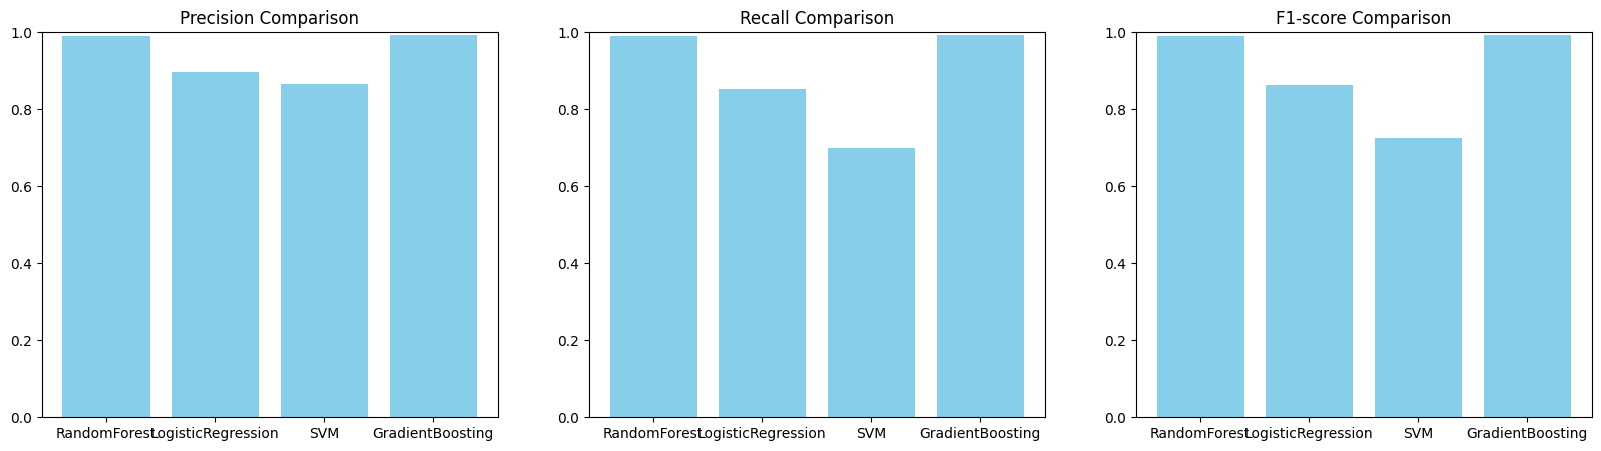

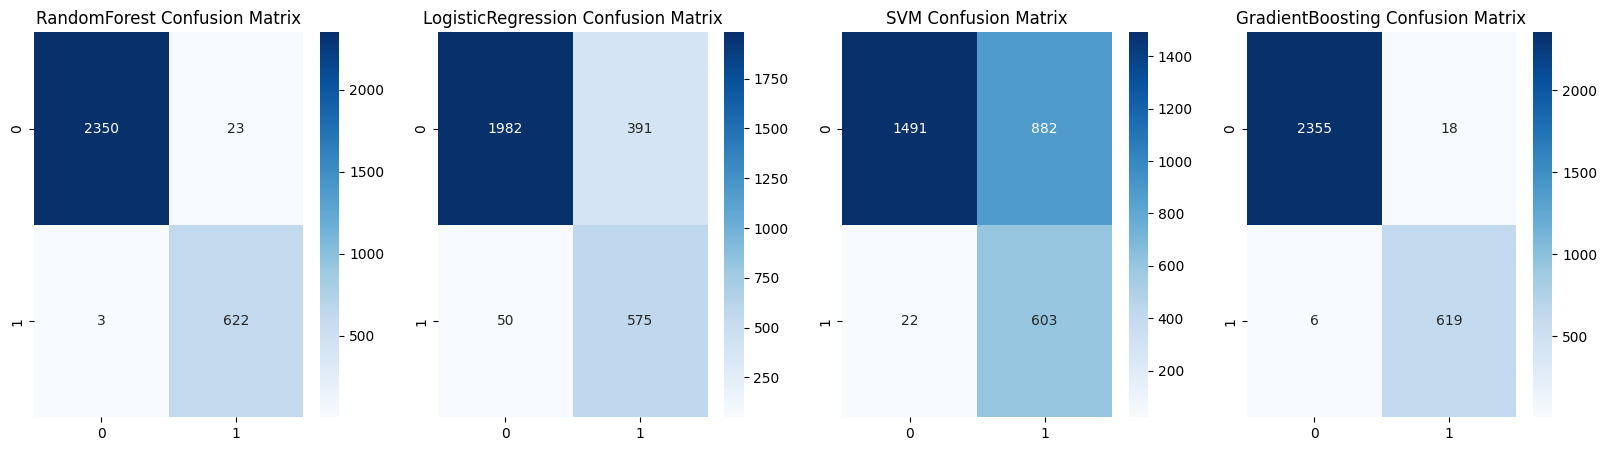

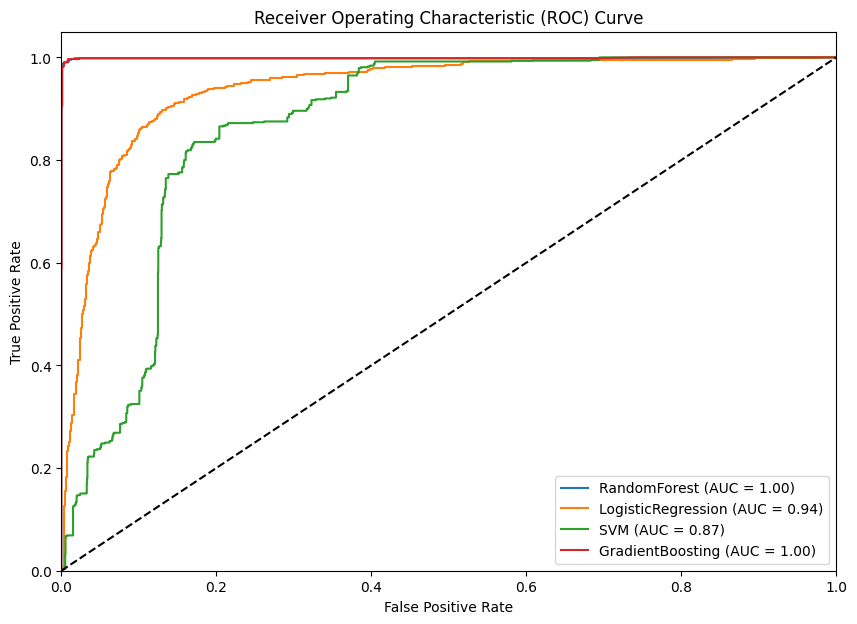

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight


x = dfe.drop('Credit rating impact', axis=1).values
y = dfe['Credit rating impact'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Define other models without parameter tuning
models = {
    'RandomForest':clf,
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(x_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    results[name] = {
        'classification_report': report,
        'confusion_matrix': cm,
        'roc_auc': auc,
        'fpr': fpr,
        'tpr': tpr
    }

# Visualization
metrics = ['precision', 'recall', 'f1-score']
models_list = list(models.keys())

# Bar chart for metrics
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for i, metric in enumerate(metrics):
    values = [results[model]['classification_report']['weighted avg'][metric] for model in models_list]
    axs[i].bar(models_list, values, color='skyblue')
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].set_ylim(0, 1)

# Confusion matrices
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, model in enumerate(models_list):
    sns.heatmap(results[model]['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'{model} Confusion Matrix')

# ROC Curves
plt.figure(figsize=(10, 7))
for model in models_list:
    plt.plot(results[model]['fpr'], results[model]['tpr'], label=f'{model} (AUC = {results[model]["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
